# Informe Técnico - Examen Transversal:

Integrantes:
* Pamela Aldana
 

Sección:MACHINE LEARNING_003V

# Caso de Machine Learning

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

import numpy as np # Programación vectorial

import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Gráficos

import matplotlib.pyplot as plt # Visualización
from matplotlib import style


# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#rt ="/content/drive/MyDrive/Base_clientes_Monopoly THIS.xlsx"
rt="/content/drive/MyDrive/solo_base__clientes_Monopoly.xlsx"

df = pd.read_excel(rt)
df.head(10)


Mounted at /content/drive


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_excel(name)  # Usa read_excel para leer archivos de Excel
df.head(10)


KeyboardInterrupt: ignored

 ## FASE 1 : COMPRENDER EL NEGOCIO

#El caso "Banco Monopoly/Dormammu"
El banco extranjero llamado "Dormammu" adquiere el banco chileno Monopoly . Dormammu ha encargado a sus ingenieros realizar un análisis de los clientes de Monopoly, comprendiendo su comportamiento y patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para abordar este nuevo mercado.

En la base de datos hay que utilizar metodologia Crisp-DM, seleccionar las variables relevantes para su interpretación y proporcionar la información necesaria a los propietarios de Dormammu para que puedan comprender a los clientes de Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado.






Variable	Descripción


*   Región	= Región de Residencia
*   Renta	= Renta del cliente
*   Sexo =	Sexo
*   Subsegmento =	Subsegmento
*   Edad =	Edad
*   Adicional	= Indicador de Tenencia de TC adicionales
*   Antiguedad	= Antigüedad del cliente (meses)
*   CambioPin	= Indicador del cambio de clave secreta de la tarjeta
*   Consumo	= Indicador de Crédito de Consumo
*   Debito =	Indicador de Tenencia de TD
*   Ctacte	= Indicador de Cuenta Corriente
*   Cuentas	= Número de cuentas que tiene el cliente
*   Hipotecario	= Indicador de Crédito Hipotecario
*   Internauta =	Indicador de cliente Internauta que usa la web del banco
*   Monoproducto =	Indicador de si el cliente es solo poseedor de una TC
*   TC	= Número de TC que tiene el cliente
*   Dualidad	= Indicador de Dualidad (Cliente es dual si tiene 2 o más TC)
*   CUPO_L1	= Cupo de la tarjeta crédito para compras nacionales
*   CUPO_MX	= Cupo de la tarjeta crédito para compras internacionales
*   CUPO_L2	= Cupo de la tarjeta crédito para avances en cuotas
*   Col_T12	= Colocación del cliente en TC en el mes X
*   ColL1TE_T12	= Revolving del cliente en TC en el mes X
*   EeccInt_T12	= Monto internacional exigido en el estado de cuenta del cliente en el
mes X
*   EeccNac_T12	= Monto nacional exigido en el estado de cuenta del cliente en el mes
X
*   Fac_T12	Monto = facturado por el cliente en TC en el mes X
*   FacAI_T12	= Monto facturado en avances internacionales por el cliente en TC en
el mes X
*   FacAN_T12 =	Monto facturado en avances nacionales por el cliente en TC en el
mes X
*   FacCCOT_T12 =	Monto facturado en compras en cuotas con tasa por el cliente en TC
en el mes X
*   FacCCPC_T12	= Monto facturado en compras en cuotas precio contado por el cliente
en TC en el mes X
*   FacCI_T12	= Monto facturado en compras internacionales por el cliente en TC en
el mes X

*   FacCN_T12	= Monto facturado en compras nacionales por el cliente en TC en el
mes X
*   FacCOL_T12	= Monto facturado en avances en cuotas por el cliente en TC en el mes
X
*   FacDebAtm_T12	= Monto facturado en avances por el cliente en TD en el mes X
*   FacDebCom_T12	= Monto facturado en compras por el cliente en TD en el mes X
*   FacPAT_T12	= Monto facturado en PAT por el cliente en TC en el mes X
*   FlgAct_T12	= Indicador de actividad en el mes X en la TC
*   FlgActAI_T12	= Indicador de actividad en avances internacionales en el mes X en la
TC
*   FlgActAN_T12	= Indicador de actividad en avances nacionales en el mes X en la TC
*   FlgActCCOT_T12	= Indicador de actividad en compras nacionales en cuotas con tasa en
el mes X en la TC
*   FlgActCCPC_T12	= Indicador de actividad en compras nacionales en cuotas precio
contado en el mes X en la TC
*   FlgActCI_T12	= Indicador de actividad en compras internacionales en el mes X en la
TC
*   FlgActCN_T12	= Indicador de actividad en compras nacionales en el mes X en la TC
*   FlgActCOL_T12	= Indicador de actividad en avances en cuotas con tasa en el mes X en
la TC
*   FlgActPAT_T12	= Indicador de actividad en PAT en el mes X en la TC
*   PagoInt_T12	= Monto de pagos de deuda internacional del cliente en el mes X
*   PagoNac_T12	= Monto de pagos de deuda nacional del cliente en el mes X
*   Txs_T12	= Número de transacciones realizados por el cliente en TC en el mes X
*   TxsAI_T12	= Número de transacciones en avances internacionales realizados por
el cliente en TC en el mes X
*   TxsAN_T12	= Número de transacciones en avances nacionales realizados por el
cliente en TC en el mes X
*   TxsCCOT_T12	= Número de transacciones en compras en cuotas con tasa realizados
por el cliente en TC en el mes X
*   TxsCCPC_T12	= Número de transacciones en compras en cuotas precio contado
realizados por el cliente en TC en el mes X
*   TxsCI_T12	= Número de transacciones en compras internacionales realizados por
el cliente en TC en el mes X
*   TxsCN_T12	= Número de transacciones en compras nacionales realizados por el
cliente en TC en el mes X

*   TxsCOL_T12	= Número de transacciones en avances en cuotas por el cliente en TC
en el mes X
*   TxsDebAtm_T12	= Número de transacciones en avances realizados por el cliente en TD
en el mes X
*   TxsDebCom_T12	= Número de transacciones en compras realizados por el cliente en TD
en el mes X
*   TxsPAT_T12	= Número de transacciones en PAT realizados por el cliente en TC en el
mes X
*   UsoL1_T12	= Monto de deuda en la línea de compras en la TC en el mes X
*   UsoL2_T12	= Monto de deuda en la línea de avances en cuotas en la TC en el mes
X
*   UsoLI_T12	= Monto de deuda en la línea de compras internacionales en la TC en
el mes X



#Datos:
 La base de datos muestra  información clientes de Monopoly que contiene 12 meses de información mensual para cada cliente, lo que resulta en un total de 574 variables y 51124 registros.


#Variables :
Las variables Cuantitativa discreta son las de tipo  int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13) .








---




## Modelo de Regresion :  Target   numerico: CUPO_L1   
INDICA: Cupo de la tarjeta credito para compras nacionales

## Modelo de clasificacion : 'target':
Target: Indicador de pago de deuda


*   0 paga la totalidad del monto
*   1 paga el monto mínimo de la deuda

variable cuantitativa discreta de dtype: int64.

---



In [ ]:
df2=df

In [ ]:
df1=df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


## FASE 2 : COMPRENDER LO DATOS

---






In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.

# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.

# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

##Analisis exploratorio de los datos

In [ ]:
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


Cantidad de registros y variables en el conjunto de datos.

###Se revisa la cantidad de filas y columnas  de la base de datos
cantidad columna: 574
cantidad filas: 51124


In [ ]:
df.shape

(51124, 574)

## Este codigo, df.columns nos muestra el nombre de las variables

In [ ]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

###  Se visualizan  la cantidad de filas y columnas, los tipos de datos en cada columna, la cantidad de valores no nulos y la cantidad de memoria utilizada.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB



#Variables :
Las variables Cuantitativa discreta son las de tipo  int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13) .






###Se muestra la cantidad de valores faltantes (NaN o NULL) en cada


columna

In [ ]:
df.isna().sum()

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

## Histograma

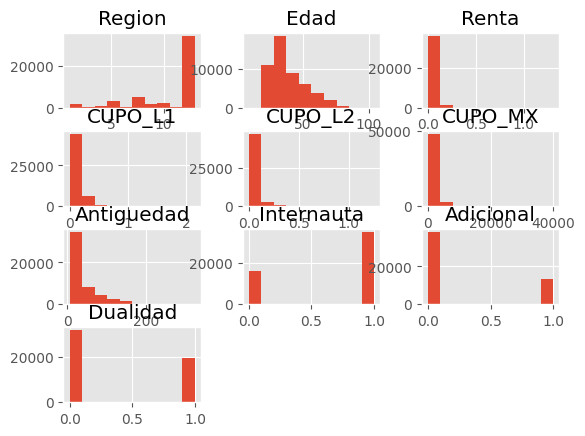

In [ ]:
df[['Sexo', 'Region', 'Edad', 'Renta','CUPO_L1', 'CUPO_L2','CUPO_MX', 'Antiguedad','Internauta', 'Adicional', 'Dualidad']].hist()
plt.show()

Visualizamos las distribucion de las variables. Ninguna de estas es tan cercana a la distribucion normal. Aunque edad es lo mas cercano a una distribucion normal.

# Estadísticas descriptivas para las variables numéricas

Analizamos los datos  para ver el tipo de distribucion de cada variable y las medidas de dispersion

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


In [ ]:
#Moda de todas las columnas
df.mode()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,170.0,H,13.0,27.0,400000.0,10.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51120,51121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51121,51122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51122,51123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mediana de todas las columnas
df.median()

Id              25562.5
Subsegmento       170.0
Region             13.0
Edad               35.0
Renta          567012.0
                 ...   
EeccInt_T01         0.0
UsoL1_T01       81129.0
UsoL2_T01       29646.5
UsoLI_T01           0.0
target              0.0
Length: 561, dtype: float64

La mediana representa la mitad de los datos.Ordenados de menor a mayor.
 La mitad de las personas en ese conjunto de datos tienen edades menores o iguales a 35 años, y la otra mitad tiene edades mayores o iguales a 35 años.
La mitad de las observaciones en ese conjunto de datos tienen  rentas menores o iguales a 567012 , y la otra mitad tiene rentas mayores o iguales a 567012.

In [ ]:
#Media de todas las columnas
df.mean()

Id              25562.500000
Subsegmento       182.024274
Region             10.828220
Edad               38.702879
Renta          663077.078726
                   ...      
EeccInt_T01         7.323155
UsoL1_T01      184092.343547
UsoL2_T01      136032.715750
UsoLI_T01           8.294372
target              0.089977
Length: 561, dtype: float64

La media representa el promedio:
UsoL1_T01 : el Monto de deuda en la linea de compras internacionales en la TC en el mes 01 es de 184092 en promedio por cliente

## Analisis  exploratorio:  




Analisis exploratorio con otras variables  revisar su distribucion, si hay sesgo, cuantos nulos, outliers y mas

### Variable PagoNac_T12

In [ ]:
pd.DataFrame([df["PagoNac_T12"].mean(), df["PagoNac_T12"].median(), df["PagoNac_T12"].mode(), df["PagoNac_T12"].std(), df["PagoNac_T12"].var(), df["PagoNac_T12"].max() - df["PagoNac_T12"].min()],
             index=['Media', 'Mediana', 'Moda', 'Desviacion Estandar', 'Varianza', 'Rango'], columns=['PagoNac_T12'])

,PagoNac_T12
Media,72569.598932
Mediana,26275.0
Moda,"0 0.0 Name: PagoNac_T12, dtype: float64"
Desviacion Estandar,184776.192417
Varianza,34142241284.133438
Rango,13873295.0


Los datos de la variable "PagoNac_T12" se ven altamente dispersos, con una media y una mediana muy diferentes . La presencia de valores atípicos puede estar afectando la media y la desviación estándar. La moda indica que 0 es el valor más común.

-Media : El valor medio o promedio de la variable es de aproximadamente 72569.60.
-Mediana: La mediana de la variable es de 26275.0. Esto indica que la mitad de los valores de "PagoNac_T12" son iguales o menores a 26,275.0 y la otra mitad son iguales o mayores a 26,275.0. La mediana es menos sensible a los valores atípicos en comparación con la media.
-Desviación Estándar: La desviación estándar es alta, con un valor de aproximadamente 184776.19. Esto indica que los valores de "PagoNac_T12" están bastante dispersos alrededor de la media. Una desviación estándar alta sugiere una variabilidad significativa en los datos.
-Varianza: La varianza es una medida de la dispersión de los datos, y su valor es de aproximadamente 34142241284.13. Es el cuadrado de la desviación estándar y refleja la variabilidad en los valores de "PagoNac_T12". Una varianza alta también indica una gran variabilidad en los datos.
-Rango: El rango es la diferencia entre el valor máximo y el valor mínimo en la variable.Es de 13873295.0, lo que significa que la diferencia entre el valor máximo y el valor mínimo de "PagoNac_T12" es bastante grande

In [ ]:
df['PagoNac_T12'].describe()

count    4.287300e+04
mean     7.256960e+04
std      1.847762e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.627500e+04
75%      8.268600e+04
max      1.387330e+07
Name: PagoNac_T12, dtype: float64

La diferencia de valores mínimos en 0 y un valor máximo significativamente mayor sugiere una distribución sesgada hacia la derecha, con valores más bajos siendo más comunes y valores extremadamente altos siendo menos comunes. La desviación estándar alta también indica una variabilidad significativa en los datos.

- Percentil 25 (Q1): El valor del primer cuartil (25%) es 0. Esto significa que el 25% de los valores en la variable "PagoNac_T12" son iguales o menores a 0.
- Percentil 50 (Q2): El valor del segundo cuartil (50%) es 26275.0, que corresponde a la mediana. Esto indica que el 50% de los valores en la variable "PagoNac_T12" son iguales o menores a 26275.0, y el otro 50% son iguales o mayores a este valor. La mediana representa la posición central en la distribución de los datos.
- Percentil 75 (Q3): El valor del tercer cuartil (75%) es 82686.0. Esto significa que el 75% de los valores en la variable "PagoNac_T12" son iguales o menores a 82686.0. Solo el 25% restante de los valores son mayores que este valor.

<Axes: xlabel='PagoNac_T12', ylabel='Density'>

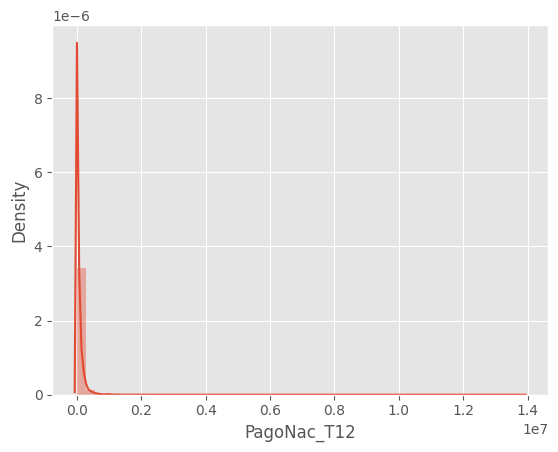

In [ ]:
# Procedemos a revisar la distribución de la variable objetivo
#
sns.distplot(df['PagoNac_T12'])

 La variable "PagoNac_T12" muestra un sesgo a la derecha, lo que significa que la mayoría de los valores están concentrados en el extremo izquierdo de la distribución, mientras que hay algunos valores extremadamente altos en el extremo derecho. Esto puede tener implicaciones importantes en el análisis y la interpretación de los datos, ya que los valores extremadamente altos pueden influir en medidas como la media y deben considerarse en el contexto del negocio o la investigación.

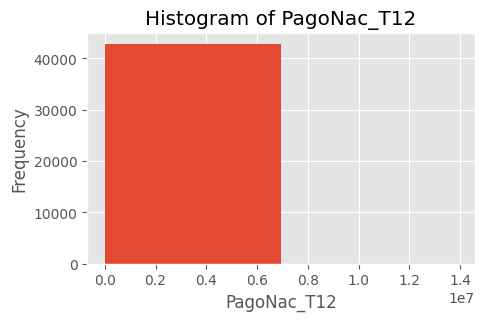

In [ ]:
#Histograma
# Define el tamaño de la figura
plt.figure(figsize=(5, 3))  # Ancho x Alto en pulgadas

# Crea el histograma
plt.hist(x=df['PagoNac_T12'], bins=2)

# Configura etiquetas y título
plt.xlabel("PagoNac_T12")
plt.ylabel("Frequency")
plt.title("Histogram of PagoNac_T12")

# Muestra el gráfico
plt.show()


El histograma de "PagoNac_T12 "muestra
Tambien se puede concluir que  el indicador 0.0 a 0.1  tiene mayor frecuencia . Esto puede producir que se sesgue el modelo hacia la mayoria.

####Variable : antiguedad

In [ ]:
df['Antiguedad'].isnull().sum()

0

In [ ]:
df['Antiguedad'].describe()

count    51124.000000
mean        38.896154
std         35.672549
min          6.000000
25%         14.000000
50%         25.000000
75%         54.000000
max        324.000000
Name: Antiguedad, dtype: float64

## Estadisticos descriptivos :
*   La media (promedio) de la variable "Antigüedad" es aproximadamente 38.90 meses. En promedio, los clientes han estado en su posición o han tenido una antigüedad de alrededor de 38.90 meses.
*   std: La desviación estándar de "Antigüedad" es aproximadamente 35.67 meses. Esto mide la dispersión o la variabilidad de los datos. Una desviación estándar alta indica que los valores están dispersos a lo largo de un rango amplio.

* min: El valor mínimo en la variable "Antigüedad" es 6 meses. Esto indica que la menor antigüedad registrada es de 6 meses.

* 25%: El primer cuartil (Q1) es 14 meses. Esto significa que el 25% de los valores son iguales o menores que 14 meses.

* 50%: La mediana (Q2) es 25 meses. El percentil 50 o el segundo cuartil. Indica que el 50% de los valores son iguales o menores que 25 meses.

* 75%: El tercer cuartil (Q3) es 54 meses. Esto significa que el 75% de los valores son iguales o menores que 54 meses.

* max: El valor máximo en la variable "Antigüedad" es 324 meses. Esto indica que la mayor antigüedad registrada es de 324 meses.












## Gráfico de distribución
 que muestra la distribución de datos de una variable numérica.

<Axes: xlabel='Antiguedad', ylabel='Density'>

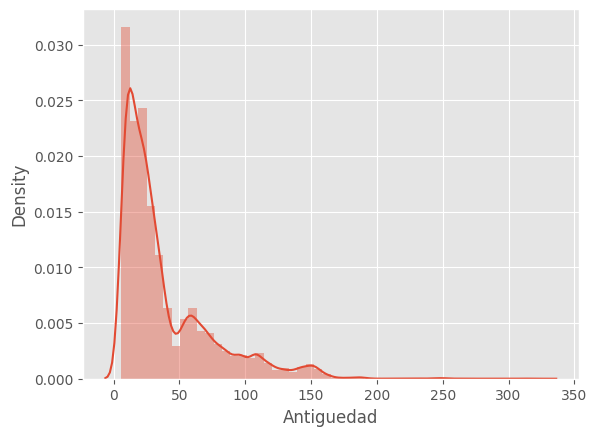

In [ ]:
sns.distplot(df['Antiguedad'])

Se puede observar que la variable antiguedad esta sesgada hacia la derecha

debido a la presencia de valores bajos y una cola larga en el extremo derecho del histograma

### variable Renta



In [ ]:
df['Renta'].isnull().sum()

13365

Esta variable contiene muchos datos faltantes el total es 13365

In [ ]:
df['Renta'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51124 entries, 0 to 51123
Series name: Renta
Non-Null Count  Dtype  
--------------  -----  
37759 non-null  float64
dtypes: float64(1)
memory usage: 399.5 KB


Este codigo nos muestra la cantidad de datos que es:  37.759 datos de la variable renta

 ### Medidas de tendencia central(moda/mediana/media)
 La  variable  tiene un sesgo hacia la derecha

In [ ]:
df['Renta'].mode()

0    400000.0
Name: Renta, dtype: float64

El valor de renta que mas se repite es  400000 en los clientes

In [ ]:
df['Renta'].median()

567012.0

In [ ]:
df['Renta'].mean()

663077.0787263963

In [ ]:
df['Renta'].quantile([.25, .5, .75,.99])

0.25     419999.00
0.50     567012.00
0.75     814903.50
0.99    2074857.56
Name: Renta, dtype: float64

El percentil 25 (primer cuartil) es 419999.00. Esto significa que el 25% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 50 (la mediana) es 567012.00. Esto significa que el 50% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 75 (el tercer cuartil) es 814,903.50. Esto significa que el 75% de los clientes tienen un sueldo igual o inferior a esta cantidad.

El percentil 99 es 2074,857.56. Esto significa que el 99% de los clientes tienen un sueldo igual o inferior a esta cantidad.

 Los percentile 99, se identifican  valores atípicos o extremadamente altos, por representa una mayor carga de datos en la distribución de sueldos.


In [ ]:
df['Renta'].std()

409279.46026800596

 La variable "Renta" tienen una variabilidad moderada en comparación con la media. Esto significa que los sueldos de los clientes pueden variar significativamente en torno a la media, lo que podría indicar que hay una amplia gama de sueldos entre los clientes.

Esta variable Renta debe preparar los datos ya que tiene muchos valores faltantes .

#Visualizacion de  distribuciones de variables numéricas y categóricas utilizando gráficos.

#Variables Numericas

In [ ]:
col_num2=[ 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2CC_T12', 'PagoNac_T12', 'EeccNac_T12','UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']
col_prom=['Region','Renta','Subsegmento','Edad','Antiguedad','EeccInt_T12','EeccNac_T12','Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12','FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','Col_T12']

In [ ]:
col_num=['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'Fac_T11', 'Txs_T11', 'FacCN_T11', 'TxsCN_T11', 'FacCI_T11', 'TxsCI_T11', 'FacAN_T11', 'TxsAN_T11', 'FacAI_T11', 'TxsAI_T11', 'FacPAT_T11', 'TxsPAT_T11', 'FacCCPC_T11', 'TxsCCPC_T11', 'FacCCOT_T11', 'TxsCCOT_T11', 'FacCOL_T11', 'TxsCOL_T11', 'FacDebCom_T11', 'TxsDebCom_T11', 'FacDebAtm_T11', 'TxsDebAtm_T11', 'Col_T11', 'ColL1T0_T11', 'ColL1TE_T11', 'ColL2T0_T11', 'ColL2AC_T11', 'ColL2CC_T11', 'ColMx_T11', 'PagoNac_T11', 'PagoInt_T11', 'EeccNac_T11', 'EeccInt_T11', 'UsoL1_T11', 'UsoL2_T11', 'UsoLI_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'Fac_T10', 'Txs_T10', 'FacCN_T10', 'TxsCN_T10', 'FacCI_T10', 'TxsCI_T10', 'FacAN_T10', 'TxsAN_T10', 'FacAI_T10', 'TxsAI_T10', 'FacPAT_T10', 'TxsPAT_T10', 'FacCCPC_T10', 'TxsCCPC_T10', 'FacCCOT_T10', 'TxsCCOT_T10', 'FacCOL_T10', 'TxsCOL_T10', 'FacDebCom_T10', 'TxsDebCom_T10', 'FacDebAtm_T10', 'TxsDebAtm_T10', 'Col_T10', 'ColL1T0_T10', 'ColL1TE_T10', 'ColL2T0_T10', 'ColL2AC_T10', 'ColL2CC_T10', 'ColMx_T10', 'PagoNac_T10', 'PagoInt_T10', 'EeccNac_T10', 'EeccInt_T10', 'UsoL1_T10', 'UsoL2_T10', 'UsoLI_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'Fac_T09', 'Txs_T09', 'FacCN_T09', 'TxsCN_T09', 'FacCI_T09', 'TxsCI_T09', 'FacAN_T09', 'TxsAN_T09', 'FacAI_T09', 'TxsAI_T09', 'FacPAT_T09', 'TxsPAT_T09', 'FacCCPC_T09', 'TxsCCPC_T09', 'FacCCOT_T09', 'TxsCCOT_T09', 'FacCOL_T09', 'TxsCOL_T09', 'FacDebCom_T09', 'TxsDebCom_T09', 'FacDebAtm_T09', 'TxsDebAtm_T09', 'Col_T09', 'ColL1T0_T09', 'ColL1TE_T09', 'ColL2T0_T09', 'ColL2AC_T09', 'ColL2CC_T09', 'ColMx_T09', 'PagoNac_T09', 'PagoInt_T09', 'EeccNac_T09', 'EeccInt_T09', 'UsoL1_T09', 'UsoL2_T09', 'UsoLI_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'Fac_T08', 'Txs_T08', 'FacCN_T08', 'TxsCN_T08', 'FacCI_T08', 'TxsCI_T08', 'FacAN_T08', 'TxsAN_T08', 'FacAI_T08', 'TxsAI_T08', 'FacPAT_T08', 'TxsPAT_T08', 'FacCCPC_T08', 'TxsCCPC_T08', 'FacCCOT_T08', 'TxsCCOT_T08', 'FacCOL_T08', 'TxsCOL_T08', 'FacDebCom_T08', 'TxsDebCom_T08', 'FacDebAtm_T08', 'TxsDebAtm_T08', 'Col_T08', 'ColL1T0_T08', 'ColL1TE_T08', 'ColL2T0_T08', 'ColL2AC_T08', 'ColL2CC_T08', 'ColMx_T08', 'PagoNac_T08', 'PagoInt_T08', 'EeccNac_T08', 'EeccInt_T08', 'UsoL1_T08', 'UsoL2_T08', 'UsoLI_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'Fac_T07', 'Txs_T07', 'FacCN_T07', 'TxsCN_T07', 'FacCI_T07', 'TxsCI_T07', 'FacAN_T07', 'TxsAN_T07', 'FacAI_T07', 'TxsAI_T07', 'FacPAT_T07', 'TxsPAT_T07', 'FacCCPC_T07', 'TxsCCPC_T07', 'FacCCOT_T07', 'TxsCCOT_T07', 'FacCOL_T07', 'TxsCOL_T07', 'FacDebCom_T07', 'TxsDebCom_T07', 'FacDebAtm_T07', 'TxsDebAtm_T07', 'Col_T07', 'ColL1T0_T07', 'ColL1TE_T07', 'ColL2T0_T07', 'ColL2AC_T07', 'ColL2CC_T07', 'ColMx_T07', 'PagoNac_T07', 'PagoInt_T07', 'EeccNac_T07', 'EeccInt_T07', 'UsoL1_T07', 'UsoL2_T07', 'UsoLI_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'Fac_T06', 'Txs_T06', 'FacCN_T06', 'TxsCN_T06', 'FacCI_T06', 'TxsCI_T06', 'FacAN_T06', 'TxsAN_T06', 'FacAI_T06', 'TxsAI_T06', 'FacPAT_T06', 'TxsPAT_T06', 'FacCCPC_T06', 'TxsCCPC_T06', 'FacCCOT_T06', 'TxsCCOT_T06', 'FacCOL_T06', 'TxsCOL_T06', 'FacDebCom_T06', 'TxsDebCom_T06', 'FacDebAtm_T06', 'TxsDebAtm_T06', 'Col_T06', 'ColL1T0_T06', 'ColL1TE_T06', 'ColL2T0_T06', 'ColL2AC_T06', 'ColL2CC_T06', 'ColMx_T06', 'PagoNac_T06', 'PagoInt_T06', 'EeccNac_T06', 'EeccInt_T06', 'UsoL1_T06', 'UsoL2_T06', 'UsoLI_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'Fac_T05', 'Txs_T05', 'FacCN_T05', 'TxsCN_T05', 'FacCI_T05', 'TxsCI_T05', 'FacAN_T05', 'TxsAN_T05', 'FacAI_T05', 'TxsAI_T05', 'FacPAT_T05', 'TxsPAT_T05', 'FacCCPC_T05', 'TxsCCPC_T05', 'FacCCOT_T05', 'TxsCCOT_T05', 'FacCOL_T05', 'TxsCOL_T05', 'FacDebCom_T05', 'TxsDebCom_T05', 'FacDebAtm_T05', 'TxsDebAtm_T05', 'Col_T05', 'ColL1T0_T05', 'ColL1TE_T05', 'ColL2T0_T05', 'ColL2AC_T05', 'ColL2CC_T05', 'ColMx_T05', 'PagoNac_T05', 'PagoInt_T05', 'EeccNac_T05', 'EeccInt_T05', 'UsoL1_T05', 'UsoL2_T05', 'UsoLI_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'Fac_T04', 'Txs_T04', 'FacCN_T04', 'TxsCN_T04', 'FacCI_T04', 'TxsCI_T04', 'FacAN_T04', 'TxsAN_T04', 'FacAI_T04', 'TxsAI_T04', 'FacPAT_T04', 'TxsPAT_T04', 'FacCCPC_T04', 'TxsCCPC_T04', 'FacCCOT_T04', 'TxsCCOT_T04', 'FacCOL_T04', 'TxsCOL_T04', 'FacDebCom_T04', 'TxsDebCom_T04', 'FacDebAtm_T04', 'TxsDebAtm_T04', 'Col_T04', 'ColL1T0_T04', 'ColL1TE_T04', 'ColL2T0_T04', 'ColL2AC_T04', 'ColL2CC_T04', 'ColMx_T04', 'PagoNac_T04', 'PagoInt_T04', 'EeccNac_T04', 'EeccInt_T04', 'UsoL1_T04', 'UsoL2_T04', 'UsoLI_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'Fac_T03', 'Txs_T03', 'FacCN_T03', 'TxsCN_T03', 'FacCI_T03', 'TxsCI_T03', 'FacAN_T03', 'TxsAN_T03', 'FacAI_T03', 'TxsAI_T03', 'FacPAT_T03', 'TxsPAT_T03', 'FacCCPC_T03', 'TxsCCPC_T03', 'FacCCOT_T03', 'TxsCCOT_T03', 'FacCOL_T03', 'TxsCOL_T03', 'FacDebCom_T03', 'TxsDebCom_T03', 'FacDebAtm_T03', 'TxsDebAtm_T03', 'Col_T03', 'ColL1T0_T03', 'ColL1TE_T03', 'ColL2T0_T03', 'ColL2AC_T03', 'ColL2CC_T03', 'ColMx_T03', 'PagoNac_T03', 'PagoInt_T03', 'EeccNac_T03', 'EeccInt_T03', 'UsoL1_T03', 'UsoL2_T03', 'UsoLI_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'Fac_T02', 'Txs_T02', 'FacCN_T02', 'TxsCN_T02', 'FacCI_T02', 'TxsCI_T02', 'FacAN_T02', 'TxsAN_T02', 'FacAI_T02', 'TxsAI_T02', 'FacPAT_T02', 'TxsPAT_T02', 'FacCCPC_T02', 'TxsCCPC_T02', 'FacCCOT_T02', 'TxsCCOT_T02', 'FacCOL_T02', 'TxsCOL_T02', 'FacDebCom_T02', 'TxsDebCom_T02', 'FacDebAtm_T02', 'TxsDebAtm_T02', 'Col_T02', 'ColL1T0_T02', 'ColL1TE_T02', 'ColL2T0_T02', 'ColL2AC_T02', 'ColL2CC_T02', 'ColMx_T02', 'PagoNac_T02', 'PagoInt_T02', 'EeccNac_T02', 'EeccInt_T02', 'UsoL1_T02', 'UsoL2_T02', 'UsoLI_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'Fac_T01', 'Txs_T01', 'FacCN_T01', 'TxsCN_T01', 'FacCI_T01', 'TxsCI_T01', 'FacAN_T01', 'TxsAN_T01', 'FacAI_T01', 'TxsAI_T01', 'FacPAT_T01', 'TxsPAT_T01', 'FacCCPC_T01', 'TxsCCPC_T01', 'FacCCOT_T01', 'TxsCCOT_T01', 'FacCOL_T01', 'TxsCOL_T01', 'FacDebCom_T01', 'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2AC_T01', 'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target']


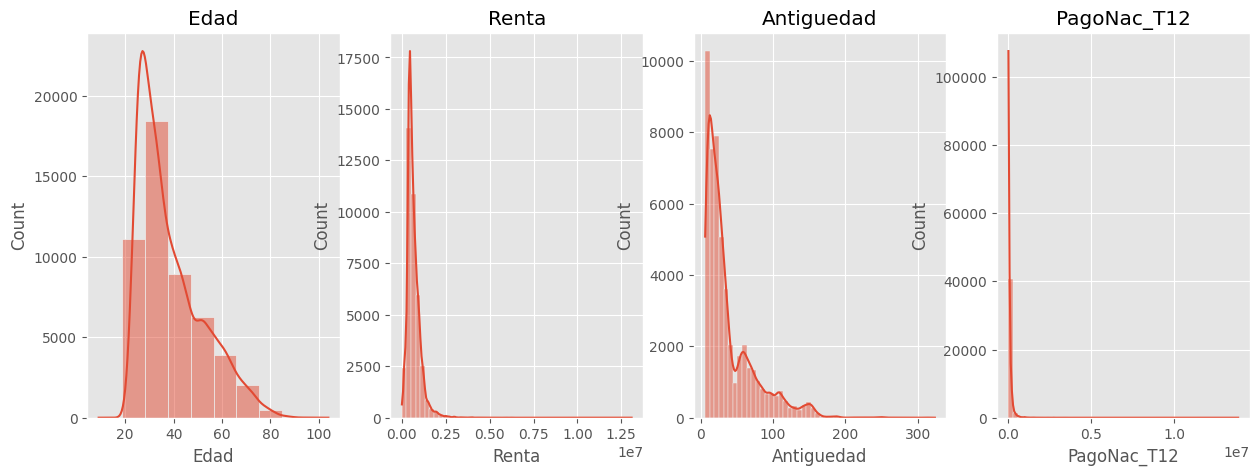

In [ ]:
# Dibujar histogramas
col_num = ['Edad', 'Renta', 'Antiguedad','PagoNac_T12']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

- Observaciones:

- La mayor parte de los clientes  tiene edades entre los 28 y los 38 años, con sesgo hacia los 20-35años
- Los mayoria de los clientes  tienen Renta baja.Los datos están sesgados hacia la izquierda o tiene un sesgo negativo(La media es menor que la mediana.).Se debe utilizar  la mediana en lugar de la media, ya que la media puede verse afectada por los valores extremadamente bajos.
- la mayor cantidad de clientes son nuevos.
- todas las variables tan sesgadas a la derecha .

#Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles.Se deben unificar

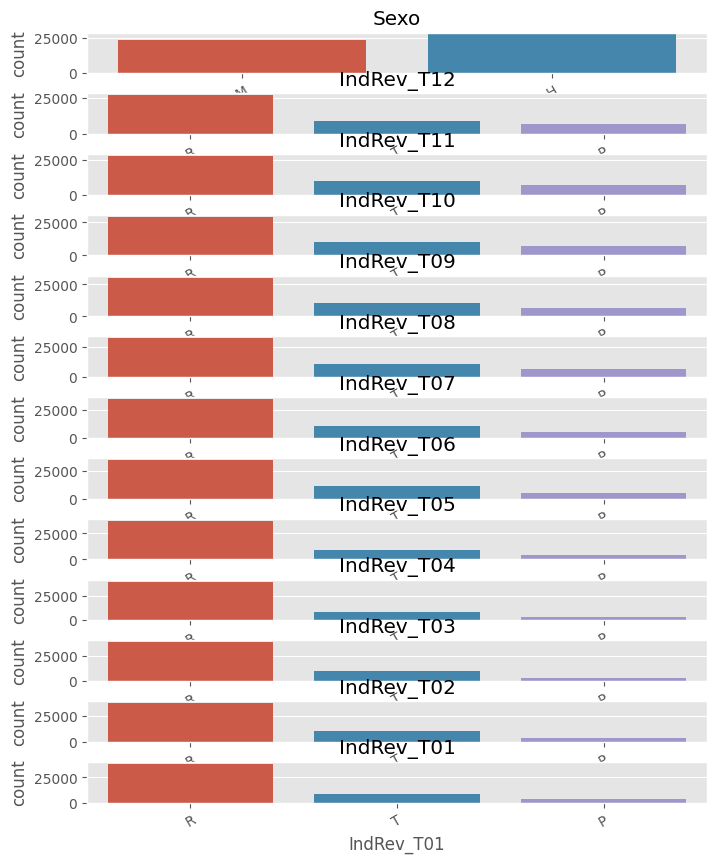

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']
# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

'R' subnivel es el que mas concentra datos

### NO HAY ERRORES TIPOGRAFICOS EN LAS CLASES DE ESTAS VARIABLES

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']
for col in col_cat:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Sexo: ['M' 'H' nan]2 subniveles
Columna IndRev_T12: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T11: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T10: ['R' 'T' nan 'P']3 subniveles
Columna IndRev_T09: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T08: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T07: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T06: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T05: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T04: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T03: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T02: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T01: ['R' 'T' 'P']3 subniveles


Observaciones:

Niveles de cada variable IndRev_: son 3 niveles
['R' 'T' 'P'].Tambien podemos observar valores nan.
Sexo tiene dos subniveles que tienen datos equilibrados y 1 null



# Valores nulos



In [ ]:
df.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

Por ejemplo :La columna sexo tiene 1 y region 53

In [ ]:
col_prom=['Region','Renta','Subsegmento','Edad','Antiguedad','EeccInt_T12','EeccNac_T12','Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12','FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','Col_T12']

## Modelo de Clasificacion se utiliza  la variable 'target',
  Indicador de pago de deuda .Se predecira que tipo clientes pagan sus deudas .

1.   0 paga la totalidad del monto  = 46524 cantidad datos
2.    1 paga el monto mínimo de la deuda =      4600 cantidad de datos


¿que perfil de cliente clasificara como deudor?

In [ ]:
df['target'].value_counts()

0    46524
1     4600
Name: target, dtype: int64

Esta variable target esta desbalanceada.

La variable objetivo no tiene nulos


In [ ]:
df['target'].isnull().sum()

0

 ###  Gráfico de barras para la columna 'target'


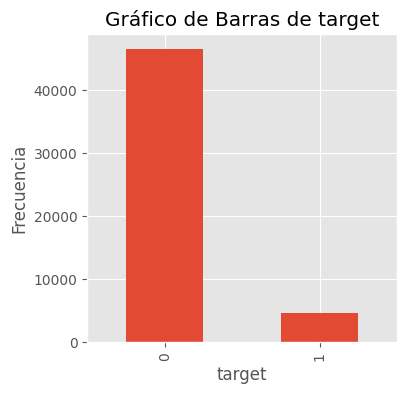

In [ ]:
plt.figure(figsize=(4, 4))
df['target'].value_counts().plot(kind='bar')
# Agrega etiquetas y título para hacer el gráfico más informativo.
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de target')
# Muestra el gráfico de barras en una ventana gráfica
plt.show()




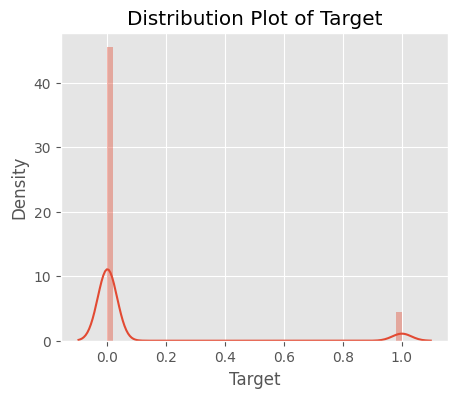

In [ ]:
plt.figure(figsize=(5, 4))  # Ancho x Alto en pulgadas
# Crea el gráfico de distribución
sns.distplot(df['target'])
# Configura etiquetas y título
plt.xlabel("Target")
plt.ylabel("Density")
plt.title("Distribution Plot of Target")

# Muestra el gráfico
plt.show()


La variable target esta desbalanceada


##  Modelo Regresion  Variable objetivo: 'CUPO_L1'
Como target de Regresion CUPO_L1 para compras nacionales con tarjeta de credito, es variable numerica continua.
Representa : Cupo de la tarjeta credito para compras nacionales.

Predeciremos cuanto cupo de tarjeta de credito se le dara a los clientes para compras nacionales







Esta variable no cuenta con datos nulos como lo señalara el siguiente codigo

In [ ]:
df['CUPO_L1'].isnull().sum()

0

In [ ]:
df.CUPO_L1.value_counts()

200000     4809
100000     3895
600000     2479
500000     2325
300000     2143
           ... 
2404650       1
793440        1
2463600       1
2636440       1
2735424       1
Name: CUPO_L1, Length: 8066, dtype: int64

In [ ]:
df['CUPO_L1'].describe()

count    5.112400e+04
mean     1.133187e+06
std      1.076922e+06
min      0.000000e+00
25%      4.000000e+05
50%      8.000000e+05
75%      1.527000e+06
max      2.153400e+07
Name: CUPO_L1, dtype: float64

mean: La media o promedio es aproximadamente 1133187. Esto significa que, en promedio, el cupo de la tarjeta de crédito para compras nacionales es alrededor de 1133187

std: La desviación estándar es aproximadamente 1076922. Esto mide la dispersión de los valores con respecto a la media. Una desviación estándar alta indica una mayor variabilidad en los datos.

min: El valor mínimo es 0. Esto significa que, al menos, uno de los registros tiene un cupo de tarjeta de crédito igual a cero.

25%: El primer cuartil (percentil 25) es 400000. Esto significa que el 25% de los registros tienen un cupo igual o inferior a 400,000.

50%: La mediana (percentil 50) es 800000. Esto indica que el 50% de los registros tienen un cupo igual o inferior a 800,000.

75%: El tercer cuartil (percentil 75) es 1527000. Esto significa que el 75% de los registros tienen un cupo igual o inferior a 1527000.

max: El valor máximo es 21534000. Este es el valor más alto en la distribución de los cupos de tarjeta de crédito para compras nacionales.


 La media es de  1133187 y la desviación estándar es de aproximadamente 1076922, indica que la mayoría de los valores se encuentran en un rango cercano a la media. Pero hay  valores más bajos y más altos que contribuyen a la alta desviación estándar.








In [ ]:
df['CUPO_L1'].mode()

0    200000
Name: CUPO_L1, dtype: int64

##Correlacion con el target numerico, son las 15 con mayor correlacion


 Se describe la relación o asociación entre dos variables. En el contexto de la exploración de datos y el análisis de datos, la correlación nos proporciona información sobre cómo dos variables numéricas están relacionadas entre sí.

In [ ]:
corr = df.corr()
top_corr = corr['CUPO_L1'].sort_values(ascending=False)[1:16]
print(top_corr)


CUPO_MX          0.811707
Antiguedad       0.522510
Edad             0.443795
TC               0.369122
Cuentas          0.354170
Dualidad         0.310016
Renta            0.289283
Adicional        0.201825
EeccNac_T07      0.180965
UsoL1_T07        0.180241
FacDebCom_T12    0.177115
UsoL1_T08        0.171738
Fac_T04          0.171503
EeccNac_T08      0.171400
FacDebCom_T08    0.170543
Name: CUPO_L1, dtype: float64


## FASE 3 : PREPARAR LOS DATOS


Esta fase implica el preprocesamiento de los datos. Incluye la limpieza de datos, la selección de características, la transformación de datos y la creación de conjuntos de datos adecuados para el modelado.

#Eliminar columnas irrelevantes
- Una columna categórica pero con un sólo nivel.
No existen el dataset
- Una columna numérica pero con un sólo valor.
No existen en dataset





- Columnas que no guarde relación con respecto a LA TARJETA DE CREDITO NACIONAL usada por el cliente en el mes X


In [ ]:
df1=df

In [ ]:
df2=df

In [ ]:
df1= df.drop(['Id','CambioPin'], axis=1)

In [ ]:
df1=df.drop(['Id', 'Subsegmento','FacPAT_T12','FacPAT_T01','FacPAT_T02', 'FacPAT_T03', 'FacPAT_T04', 'FacPAT_T05','FacPAT_T06', 'FacPAT_T07', 'FacPAT_T08', 'FacPAT_T09','FacPAT_T10', 'FacPAT_T11'    ], axis=1)
df1.shape

(51124, 560)

In [ ]:
df1=df.drop([ 'Col_T12','Col_T11','Col_T10','Col_T01','Col_T02','Col_T03','Col_T04','Col_T05','Col_T06','Col_T07','Col_T08','Col_T09'  ], axis=1)
df1.shape

(51124, 562)

In [ ]:
df1=df.drop([ 'ColL1TE_T12','ColL1TE_T11','ColL1TE_T10','ColL1TE_T01','ColL1TE_T02','ColL1TE_T03','ColL1TE_T04','ColL1TE_T05','ColL1TE_T06','ColL1TE_T07','ColL1TE_T08','ColL1TE_T09'  ], axis=1)


In [ ]:
df1=df.drop([ 'TxsDebCom_T01', 'TxsDebCom_T02', 'TxsDebCom_T03', 'TxsDebCom_T04', 'TxsDebCom_T05', 'TxsDebCom_T06', 'TxsDebCom_T07', 'TxsDebCom_T08', 'TxsDebCom_T09', 'TxsDebCom_T10', 'TxsDebCom_T11', 'TxsDebCom_T12'], axis=1)


In [ ]:
df1=df.drop(['TxsCOL_T01', 'TxsCOL_T02', 'TxsCOL_T03', 'TxsCOL_T04', 'TxsCOL_T05', 'TxsCOL_T06', 'TxsCOL_T07', 'TxsCOL_T08', 'TxsCOL_T09', 'TxsCOL_T10', 'TxsCOL_T11', 'TxsCOL_T12','TxsCI_T01', 'TxsCI_T02', 'TxsCI_T03', 'TxsCI_T04', 'TxsCI_T05', 'TxsCI_T06', 'TxsCI_T07', 'TxsCI_T08', 'TxsCI_T09', 'TxsCI_T10', 'TxsCI_T11', 'TxsCI_T12','TxsAI_T01', 'TxsAI_T02', 'TxsAI_T03', 'TxsAI_T04', 'TxsAI_T05', 'TxsAI_T06', 'TxsAI_T07', 'TxsAI_T08', 'TxsAI_T09', 'TxsAI_T10', 'TxsAI_T11', 'TxsAI_T12','TxsCCOT_T01', 'TxsCCOT_T02', 'TxsCCOT_T03', 'TxsCCOT_T04', 'TxsCCOT_T05', 'TxsCCOT_T06', 'TxsCCOT_T07', 'TxsCCOT_T08', 'TxsCCOT_T09', 'TxsCCOT_T10', 'TxsCCOT_T11', 'TxsCCOT_T12','TxsAN_T01', 'TxsAN_T02', 'TxsAN_T03', 'TxsAN_T04', 'TxsAN_T05', 'TxsAN_T06', 'TxsAN_T07', 'TxsAN_T08', 'TxsAN_T09', 'TxsAN_T10', 'TxsAN_T11', 'TxsAN_T12','PagoInt_T01', 'PagoInt_T02', 'PagoInt_T03', 'PagoInt_T04', 'PagoInt_T05', 'PagoInt_T06', 'PagoInt_T07', 'PagoInt_T08', 'PagoInt_T09', 'PagoInt_T10', 'PagoInt_T11', 'PagoInt_T12','FlgActPAT_T01', 'FlgActPAT_T02', 'FlgActPAT_T03', 'FlgActPAT_T04', 'FlgActPAT_T05', 'FlgActPAT_T06', 'FlgActPAT_T07', 'FlgActPAT_T08', 'FlgActPAT_T09', 'FlgActPAT_T10', 'FlgActPAT_T11', 'FlgActPAT_T12' ], axis=1)


In [ ]:
df1=df.drop(['Dualidad','CambioPin','TC' ], axis=1)

In [ ]:
df1= df.drop(['Id'], axis=1)

La columnas CambioPin tienen desviaciones estándar ("std") igual cero, lo que indica que  tienen un único valor.

Borraremos esta variable

Se elimina las variable'CambioPIn' con un 37% de datos faltantes ;no es  importantes a considerar al para el perfil de clientes que paga total del monto de deuda.


#Verifiquemos  columnas numéricas:


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Subsegmento,51124.0,182.024274,29.276596,151.00,160.0,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.0,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.0,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.0,567012.0,814903.50,13089327.00
Antiguedad,51124.0,38.896154,35.672549,6.00,14.0,25.0,54.00,324.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.0,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.5,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.0,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.0,0.0,0.00,3929.81


In [ ]:
df2=df1

In [ ]:
df3=df1

# Datos faltantes

In [ ]:
df1.isna().sum()

Subsegmento        0
Sexo               1
Region            53
Edad               0
Renta          13365
               ...  
UsoL1_T01          0
UsoL2_T01          0
UsoLI_T01          0
IndRev_T01         0
target             0
Length: 573, dtype: int64

#Imputacion datos faltantes

### Se imputan los datos por 0 .Para el analisis df_num

In [ ]:
df1['EeccNac_T07'] = df1['EeccNac_T07'].fillna(0)

In [ ]:
df1['Renta'] = df1['Renta'].fillna(0)


In [ ]:
# Calcular la media de la variable "Región" (ignorando los valores N
df1['Region'].mean()




10.828219537506609

In [ ]:
# Imputar los valores faltantes con la media
df1['Renta'] = df1['Renta'].fillna(10.828)

In [ ]:
df1.isna().sum()

Subsegmento     0
Sexo            1
Region         53
Edad            0
Renta           0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 573, dtype: int64

In [ ]:
df1 = df1.dropna()


In [ ]:
df1.isna().sum()

Subsegmento    0
Sexo           0
Region         0
Edad           0
Renta          0
              ..
UsoL1_T01      0
UsoL2_T01      0
UsoLI_T01      0
IndRev_T01     0
target         0
Length: 573, dtype: int64

Se eliminaron los null

#OUTLIERS

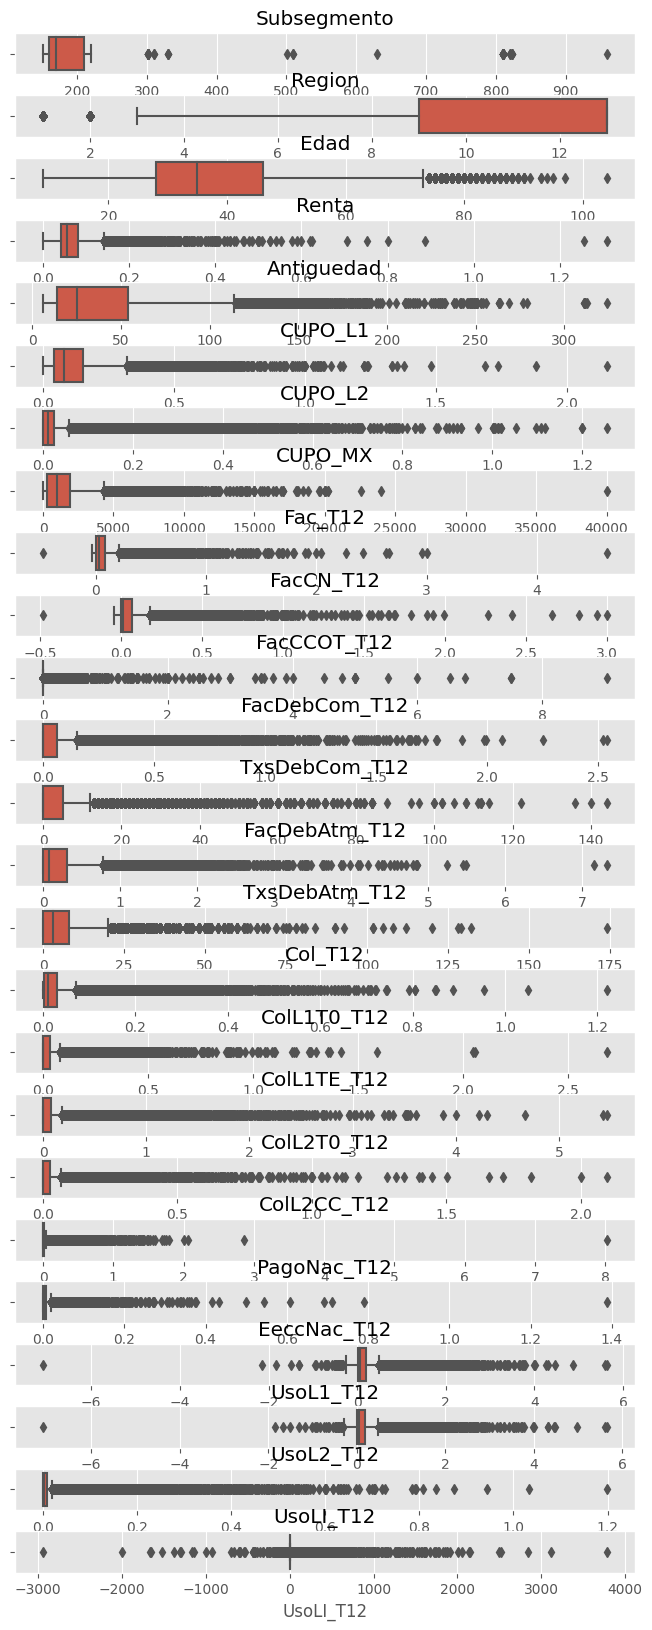

In [ ]:
# Generar gráficas individuales pues las variables numéricas
col_num=[ 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2CC_T12', 'PagoNac_T12', 'EeccNac_T12','UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']

fig, ax = plt.subplots(nrows=25, ncols=1, figsize=(8,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)


In [ ]:
# Eliminar filas outliers con "edad">78
print(f'Tamaño del set antes de eliminar registros de edad: {df1.shape}')
df1 = df1[df1['Edad']<=78]
print(f'Tamaño del set después de eliminar registros de edad: {df1.shape}')

Tamaño del set antes de eliminar registros de edad: (25639, 573)
Tamaño del set después de eliminar registros de edad: (25639, 573)


Observaciones:

"Edad": los clientes tiene edades maximo  76 años



Originalmente tenía registros y 574 columnas. El dataset resultante tiene 25639 filas , 573 columnas



<class 'pandas.core.frame.DataFrame'>
Int64Index: 50835 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.0+ MB


In [ ]:
corr= df.corr()
top_corr_clasif = corr['target'].sort_values(ascending=False)[1:16]
print(top_corr_clasif)


ColL1TE_T04    0.203420
ColL1TE_T03    0.201849
ColL1TE_T05    0.198688
ColL1TE_T02    0.198573
ColL1TE_T01    0.192870
ColL1TE_T06    0.189988
UsoL1_T05      0.164768
ColL1TE_T07    0.164015
UsoL1_T04      0.163230
UsoL1_T06      0.162671
EeccNac_T05    0.162197
EeccNac_T04    0.160635
UsoL1_T03      0.156908
EeccNac_T06    0.154989
UsoL1_T02      0.151080
Name: target, dtype: float64


In [ ]:
df_clasificacion=corr = df1.corr()
top_corr = corr['CUPO_L1'].sort_values(ascending=False)[1:16]
print(top_corr)


CUPO_MX          0.824001
Antiguedad       0.513903
Edad             0.437027
Cuentas          0.404895
TC               0.400089
Dualidad         0.356105
Renta            0.267447
FacDebCom_T12    0.207639
Adicional        0.192915
FacDebAtm_T11    0.192423
FacDebCom_T11    0.190734
FacDebCom_T08    0.190545
FacDebAtm_T09    0.189232
FacDebCom_T09    0.188999
FacDebCom_T10    0.188906
Name: CUPO_L1, dtype: float64


In [ ]:
df1.head()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
2,170,H,13.0,45,929106.0,24,1,1,0,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,151,H,13.0,46,172447.0,134,0,1,0,1,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,170,H,13.0,46,805250.0,116,0,1,1,0,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
5,170,H,13.0,47,707664.0,67,1,1,0,0,...,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0
6,811,H,13.0,48,1022833.0,21,1,0,1,0,...,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0


## Crea dataset  df_num
Para realizar analisis Modelo regresion
Se eligen 6 variables que tiene correlacion con le target numerico 'CUPO_L1'



In [ ]:
df_num = df1[['Antiguedad', 'Edad', 'Renta', 'Cuentas', 'Adicional', 'EeccNac_T07', 'CUPO_L1']]


## Crea dataset  df_cla
Para realizar analisis Modelo clasificacion
Se eligen 6 variables que tiene correlacion con le target y causalidad

In [ ]:
df_cla = df1[['target','ColL1TE_T04','ColL1TE_T03','ColL1TE_T05','ColL1TE_T02','ColL1TE_T06', 'UsoL1_T05', 'UsoL1_T04', 'UsoL1_T06','EeccNac_T05' ]]


In [ ]:
df1['target'].dtype

dtype('int64')

## FASE 4: MODELAMIENTO

---




# Modelo de regresion

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



 Dividir los datos en conjuntos de entrenamiento y prueba.

In [ ]:
X = df_num.drop('CUPO_L1', axis=1)  # Características (todas las columnas excepto 'target')
y = df_num['CUPO_L1']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("R squared of the Linear Regression on training set: {:.2%}".format(model.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(model.score(X_test, y_test)))

R squared of the Linear Regression on training set: 48.04%
R squared of the Linear Regression on test set: 43.35%


<Axes: xlabel='CUPO_L1'>

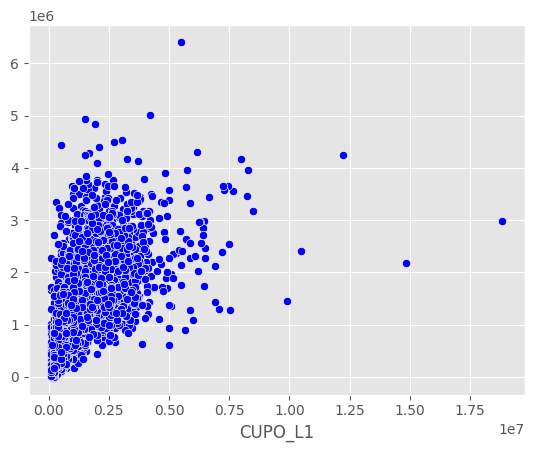

In [ ]:
y_pred = model.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R-squared): {r2:.2f}")


Error cuadrático medio (MSE): 722760749087.98
Coeficiente de determinación (R-squared): 0.43


## Modelo un árbol de decisión para regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: -5.52%


<Axes: xlabel='CUPO_L1'>

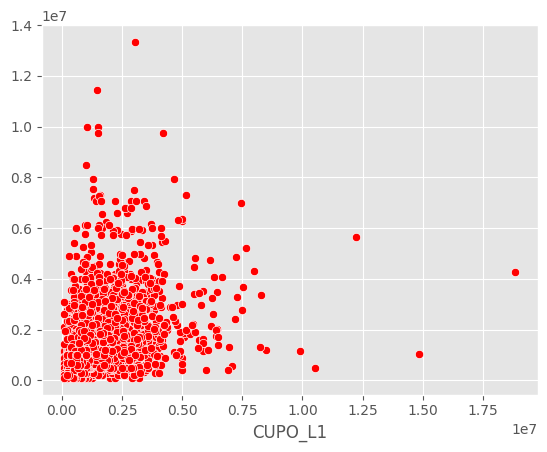

In [ ]:
y_pred1 = tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred1, color="red")

In [ ]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr_1=df_lr.abs()


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 680199.63


# Modelo  de clasificacion : 'target'

In [ ]:
#df_cla['target'] = df_cla['target'].map({True: 1, False: 0})

##Creamos Dataset

In [ ]:
y = df_cla['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
LABELS = ['False', 'True']

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero target')
    plt.xlabel('Predicted target')
    plt.show()
    print (classification_report(y_test, pred_y))

y_test :son los valores reales del conjunto de datos de prueba, las etiquetas o la variable objetivo que se trata de predecir. pred_y : son las predicciones del modelo en el conjunto de datos de prueba.

## Ejecutamos Modelo Regresion Logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
X = df_cla.drop('target', axis=1)  # Características (todas las columnas excepto 'target')
y = df_cla['target']  # Variable objetivo 'target'

# Dividir los datos en conjuntos de entrenamiento y prueba (usualmente 80-20 o 70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Crear y entrenar el modelo de regresión logística

In [ ]:
model = LogisticRegression()  # Crear el modelo
model.fit(X_train, y_train)  # Entrenar el modelo


LogisticRegression()

: Realizar predicciones en el conjunto de prueba

In [ ]:
y_pred = model.predict(X_test)


Precisión del modelo: 0.88
Matriz de Confusión:
 [[4450  240]
 [ 391   47]]


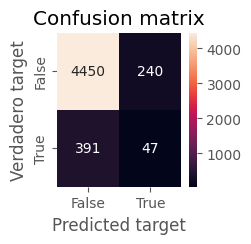

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4690
           1       0.16      0.11      0.13       438

    accuracy                           0.88      5128
   macro avg       0.54      0.53      0.53      5128
weighted avg       0.85      0.88      0.87      5128



In [ ]:
accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión
print(f'Precisión del modelo: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)  # Matriz de confusión
print('Matriz de Confusión:\n', confusion)

report = classification_report(y_test, y_pred)  # Informe de clasificación
mostrar_resultados(y_test, y_pred)


# Random Forest

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.4s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


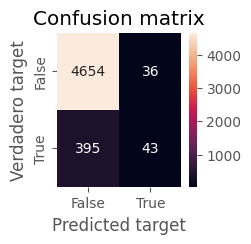

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4690
           1       0.54      0.10      0.17       438

    accuracy                           0.92      5128
   macro avg       0.73      0.55      0.56      5128
weighted avg       0.89      0.92      0.89      5128



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con 100 arboles
model_rf = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
# entrenar!
model_rf.fit(X_train, y_train)
# Obtener las predicciones en el conjunto de prueba
pred_y_rf = model_rf.predict(X_test)
# Mostrar los resultados
mostrar_resultados(y_test, pred_y_rf)

## FASE 5 : EVALUACION DE MODELOS

## Modelo de clasificacion ='target'

Se evalua la curva roc de cada modelo de clasificacion

Regresión Logística - Precisión: 0.8739
Random Forest - Precisión: 0.9136
Ensamblados - Precisión: 0.9100


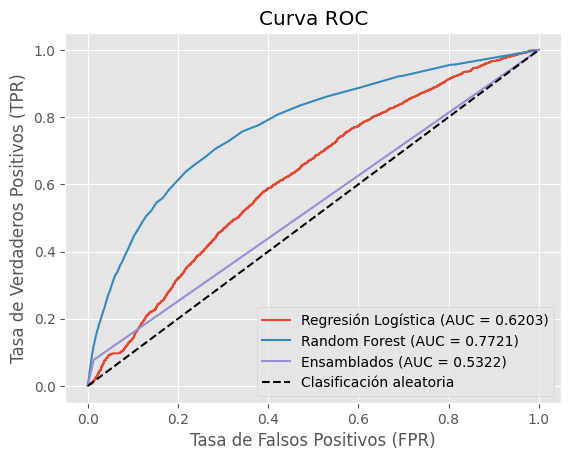

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Crear instancias de los modelos
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
ensemble = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', random_forest)], voting='soft')

# Validación cruzada y obtención de predicciones
models = [logistic_regression, random_forest, ensemble]
model_names = ['Regresión Logística', 'Random Forest', 'Ensamblados']

for i, model in enumerate(models):
    # Validación cruzada
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_names[i]} - Precisión: {scores.mean():.4f}")

    # Obtención de predicciones
    if isinstance(model, VotingClassifier):
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    else:
        y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.4f})')

# Configuración del gráfico

plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


El modelo de clasificacion 'target 'no tiene una capacidad de discriminación para distinguir entre las clases positivas y negativas.
La curva ROC se encuentra por encima de la línea diagonal, significa que el modelo tiene una capacidad de discriminación mejor que el azar, lo que indica un buen rendimiento.

La curva ROC se encuentra por debajo de la línea diagonal, el modelo tiene una capacidad de discriminación peor que el azar, lo que indica un mal rendimiento.

## FASE 6: DESPLIEGUE